In [1]:
import pandas as pd
import matplotlib.pyplot as plt         
import os        

In [2]:
#log_pathからpltに用いるdfを作成

def make_df_from_log_path(log_path):
    search_string = "[Evaluate]"
    output_lines = []

    with open(log_path, 'r') as file:
        lines = file.readlines()

        for i, line in enumerate(lines):
            if search_string in line:
                output_lines.extend(lines[i:i+1])

    data = output_lines

    # 各行をスペースで分割し、キーと値のペアに分ける
    parsed_data = [line.strip().split(' ') for line in data]
    # print(parsed_data)


    # 各行のデータを辞書に格納し、DataFrameを作成する
    result = []
    for line in parsed_data:
        row_data = {}
        i=0
        for item in line:
            try:
                if(i>1):
                    key_value = item.split(':')
                    row_data[key_value[0]] = float(key_value[1])
                
                if(i==1):
                    # print(item)
                    key_value = item.split('_')
                    row_data[key_value[0]] = int(key_value[1][:7])
                    
            except:
                print(item)
                
            i+=1
        result.append(row_data)
        
    # print(result)

    # DataFrameを作成する
    df = pd.DataFrame(result)
    # print(df)
    return df



In [4]:
log_path_1 = "/home/fukuda/profit-naacl/profit-naacl/nodhup_outputs/tweetsonly_10_validate_sharpe.log"
df_1 = make_df_from_log_path(log_path_1)

log_path_2 = "/home/fukuda/profit-naacl/profit-naacl/nodhup_outputs/tweetsonly_11.log"
df_2 = make_df_from_log_path(log_path_2)
# print(df_2)

dfs = [df_1, df_2]
log_files = [os.path.basename(log_path_1), os.path.basename(log_path_2)]
print(log_files)



['tweetsonly_10_validate_sharpe.log', 'tweetsonly_11.log']


/home/fukuda/profit-naacl/profit-naacl_2/pngs/mean_reward_tweetsonly_10_validate_sharpe.log_tweetsonly_11.log.png


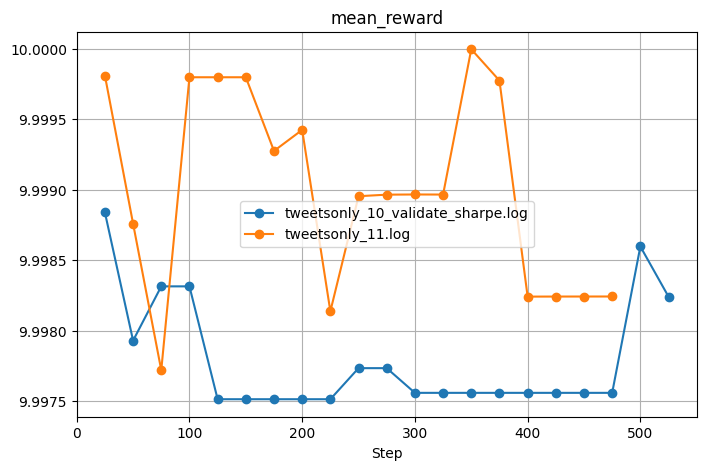

In [6]:


# x軸にはdfの一列目のデータを、y軸には2列目以降のデータをプロットします
plt.figure(figsize=(8, 5))  # グラフのサイズを設定します
for df, log_file in zip(dfs, log_files):
    df = df[:21]
    for column in df.columns[1:2]:  # ここで何列目をプロットするか設定
        plt.plot(df[df.columns[0]], df[column], marker='o', label=log_file)

# df = df_2
# df = df[:21]
# for column in df.columns[1:2]:  # ここで何列目をプロットするか設定
#     plt.plot(df[df.columns[0]], df[column], marker='o', label=column)

plt.xlabel(dfs[0].columns[0])  # x軸のラベルを設定します
# plt.ylabel("Values")  # y軸のラベルを設定します
title = column
plt.title(title)  # グラフのタイトルを設定します
plt.legend()  # 凡例を追加します
plt.grid(True)  # グリッドを表示します（オプション）

save_png_name = title + "_" + log_files[0] + "_" + log_files[1] + ".png"
save_folder = "/home/fukuda/profit-naacl/profit-naacl_2/pngs"
save_path = os.path.join(save_folder, save_png_name)
print(save_path)
plt.savefig(save_path)

plt.show()  # グラフを表示します

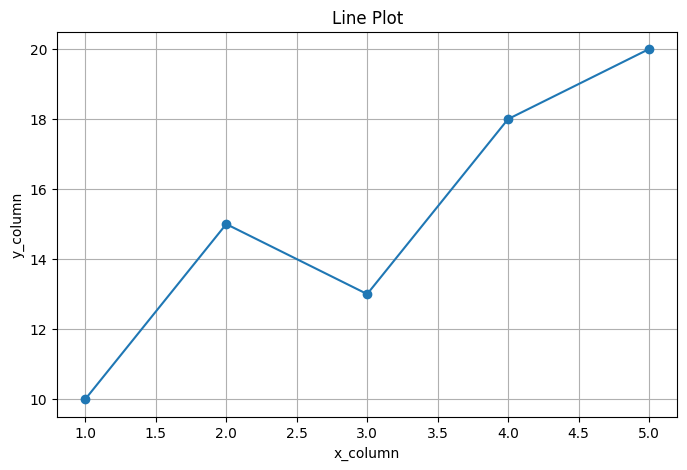

In [11]:
data = {
    'x_column': [1, 2, 3, 4, 5],  # 一列目（x軸）
    'y_column': [10, 15, 13, 18, 20]  # 二列目（y軸）
}
df = pd.DataFrame(data)

# x軸にはdfの一列目のデータを、y軸には二列目のデータをプロットします
plt.figure(figsize=(8, 5))  # グラフのサイズを設定します

plt.plot(df[df.columns[0]], df[df.columns[1]], marker='o')  # 折れ線グラフをプロットします

plt.xlabel(df.columns[0])  # x軸のラベルを設定します
plt.ylabel(df.columns[1])  # y軸のラベルを設定します
plt.title("Line Plot")  # グラフのタイトルを設定します
plt.grid(True)  # グリッドを表示します（オプション）